In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
diabetes = datasets.load_diabetes()
x,y=diabetes.data,diabetes.target

In [12]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=13)
params={'n_estimators':500,
       'max_depth':4,
       'min_samples_split':5,
       'learning_rate':0.01,
       'loss':'ls'}

In [5]:
reg=ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train,y_train)

mse=mean_squared_error(y_test,reg.predict(x_test))
print("The Mean Squared error (MSE) on test set :{:.4f}".format(mse))

The Mean Squared error (MSE) on test set :3028.0608


In [6]:
test_score=np.zeros((params['n_estimators'],),dtype=np.float64)
for i ,y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i]=reg.loss_(y_test,y_pred)

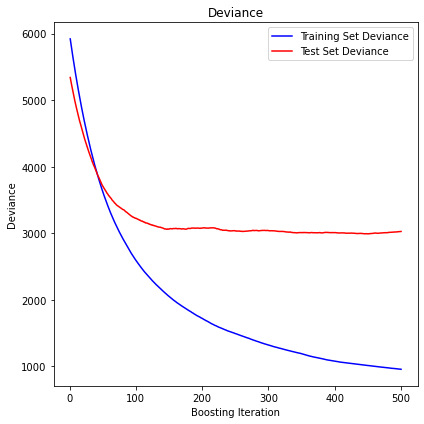

In [7]:
fig=plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators'])+1,reg.train_score_,'b-',
        label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators'])+1,test_score,'r-',
        label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iteration')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

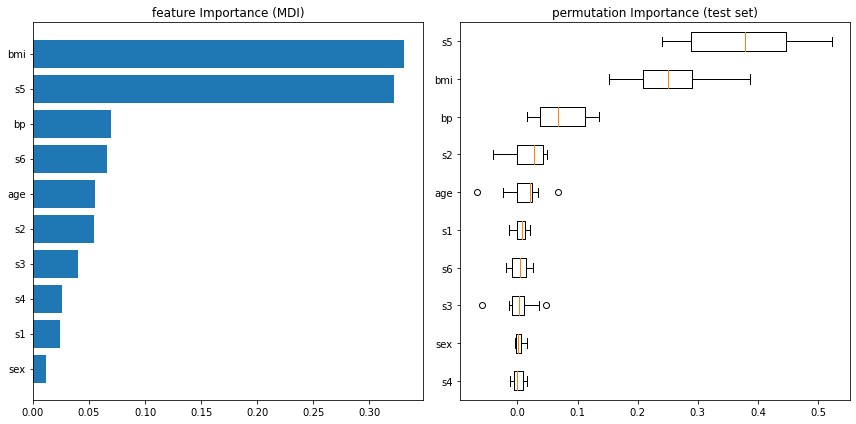

In [10]:
feature_importance=reg.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.barh(pos,feature_importance[sorted_idx],align='center')
plt.yticks(pos,np.array(diabetes.feature_names)[sorted_idx])
plt.title('feature Importance (MDI)')
 
result=permutation_importance(reg,x_test,y_test,n_repeats=10,
                             random_state=42,n_jobs=2)
sorted_idx=result.importances_mean.argsort()
plt.subplot(1,2,2)
plt.boxplot(result.importances[sorted_idx].T,
           vert=False,labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("permutation Importance (test set)")
fig.tight_layout()
plt.show()